# Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel para pessoas comuns 

### Contexto

No Airbnb, qualquer pessoa que tenha um quarto ou um imóvel de qualquer tipo (apartamento, casa, chalé, pousada, etc.) pode ofertar o seu imóvel para ser alugado por diária.

Você cria o seu perfil de host (pessoa que disponibiliza um imóvel para aluguel por diária) e cria o anúncio do seu imóvel.

Nesse anúncio, o host deve descrever as características do imóvel da forma mais completa possível, de forma a ajudar os locadores/viajantes a escolherem o melhor imóvel para eles (e de forma a tornar o seu anúncio mais atrativo)

Existem dezenas de personalizações possíveis no seu anúncio, desde quantidade mínima de diária, preço, quantidade de quartos, até regras de cancelamento, taxa extra para hóspedes extras, exigência de verificação de identidade do locador, etc.

### Nosso objetivo

Construir um modelo de previsão de preço que permita uma pessoa comum que possui um imóvel possa saber quanto deve cobrar pela diária do seu imóvel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média para imóveis com as mesmas características) ou não.

### O que temos disponível, inspirações e créditos

As bases de dados foram retiradas do site kaggle: https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro

Elas estão disponíveis para download abaixo da aula (se você puxar os dados direto do Kaggle pode ser que encontre resultados diferentes dos meus, afinal as bases de dados podem ter sido atualizadas).

Caso queira uma outra solução, podemos olhar como referência a solução do usuário Allan Bruno do kaggle no Notebook: https://www.kaggle.com/allanbruno/helping-regular-people-price-listings-on-airbnb

Você vai perceber semelhanças entre a solução que vamos desenvolver aqui e a dele, mas também algumas diferenças significativas no processo de construção do projeto.

- As bases de dados são os preços dos imóveis obtidos e suas respectivas características em cada mês.
- Os preços são dados em reais (R$)
- Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados

### Expectativas Iniciais

- Acredito que a sazonalidade pode ser um fator importante, visto que meses como dezembro costumam ser bem caros no RJ
- A localização do imóvel deve fazer muita diferença no preço, já que no Rio de Janeiro a localização pode mudar completamente as características do lugar (segurança, beleza natural, pontos turísticos)
- Adicionais/Comodidades podem ter um impacto significativo, visto que temos muitos prédios e casas antigos no Rio de Janeiro

Vamos descobrir o quanto esses fatores impactam e se temos outros fatores não tão intuitivos que são extremamente importantes.

### Como funciona um Projeto de Cencia de Dados?
1. Entendimento do desafio que você quer resolver
2. Entendimento da Empresa/Área
3. Extração/Obtenção de Dados
4. Ajustes de Dados(Limpeza de Dados)
5. Análise Exploratória
6. Modelagem +Algorítimos
7. Interpretação de resultados
8. Deploy/Produção

### Importar Bibliotecas e Bases de Dados

In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
meses= {'jan':1,'fev':2, 'mar':3, 'abr':4, 'mai':5, 'jun':6, 'jul':7, 'ago':8, 'set':9, 'out':10, 'nov':11, 'dez':12}

caminho_bases = pathlib.Path(r'C:\Users\magal\OneDrive\Área de Trabalho\aula python\Projeto 03 Ciência de Dados\dataset')

base_airbnb = pd.DataFrame()
for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name [:3]
    mes =meses[nome_mes]
    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv', ''))
    df=pd.read_csv(caminho_bases/arquivo.name)
    df['mes']= mes
    df['ano']= ano
    base_airbnb = base_airbnb.append(df)
    
display(base_airbnb)

D:\Users\magal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (62,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
D:\Users\magal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
D:\Users\magal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,38844730,https://www.airbnb.com/rooms/38844730,20190923212307,2019-09-24,TRANSAMERICA BARRA DA TIJUCA R IV,"Em estilo contemporâneo, o Transamerica Prime ...",NaN,"Em estilo contemporâneo, o Transamerica Prime ...",none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,15.0,0.0,0.0
34325,38846408,https://www.airbnb.com/rooms/38846408,20190923212307,2019-09-24,Alugo para o Rock in Rio,"Confortável apartamento, 2 quartos , sendo 1 s...",O apartamento estará com mobília completa disp...,"Confortável apartamento, 2 quartos , sendo 1 s...",none,"Muito próximo ao Parque Olímpico, local do eve...",...,2.0,2.0,1125.0,1125.0,2.0,1125.0,0.0,1.0,0.0,0.0
34326,38846703,https://www.airbnb.com/rooms/38846703,20190923212307,2019-09-24,Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA,Apartamento quarto e sala COMPLETO para curtas...,Espaço ideal para até 5 pessoas. Cama de casal...,Apartamento quarto e sala COMPLETO para curtas...,none,NaN,...,3.0,3.0,1125.0,1125.0,3.0,1125.0,0.0,23.0,6.0,0.0
34327,38847050,https://www.airbnb.com/rooms/38847050,20190923212307,2019-09-24,Cobertura Cinematografica,Cobertura alto nivel,NaN,Cobertura alto nivel,none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,1.0,0.0,0.0


### Consolidar Base de Dados
- Como temos muitas colunas, nosso modelo pode acabar ficando muito lento.
- Uma análise rápida permite ver que várias colunas não são necessárias para o nosso modelo de previsão, por isso, vamos excluir algumas colunas de nossa base.
- Tipos de colunas que vamos excluir:
    1. IDs, links e informaçoes não relevantes para o modelo
    2. Colunas repetidas ou extremamente parecidas com outra (que passam a mesma informaçao para o modelo) Ex. Data x mes/ano
    3. Colunas preenchidas com texto livre (Não rodaremos nenhuma análise com palavras nesse modelo)
    4. Colunas em que todos ou quase todos os valores são iguais
- Para isso vamos criar um arquivo em excell com os 1000 primeiros registros, para fazer uma analise qualitativa 

In [3]:
print(list(base_airbnb.columns))
base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep=";")

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [4]:
#celula auxiliar para análise de coluna
print(base_airbnb['experiences_offered'].value_counts())

none    902210
Name: experiences_offered, dtype: int64


In [5]:
#celula auxiliar para análise de coluna
print((base_airbnb['host_listings_count']==base_airbnb['host_total_listings_count']).value_counts())

True     901750
False       460
dtype: int64


In [6]:
#celula auxiliar para análise de coluna
print(base_airbnb['square_feet'].isnull().sum())

888162


### Depois da análise qualitativa das colunas, levando em consideração os critérios acima, chegamos a uma base de dados mais limpa.

In [7]:
colunas=['host_response_time','host_response_rate','host_is_superhost','host_listings_count','host_has_profile_pic','host_identity_verified','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','mes','ano']
base_airbnb = base_airbnb.loc[:, colunas]
display(base_airbnb)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,mes,ano
0,NaN,NaN,f,1.0,t,t,-22.946854,-43.182737,Apartment,Entire home/apt,...,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,4,2018
1,within an hour,100%,t,2.0,t,f,-22.965919,-43.178962,Condominium,Entire home/apt,...,9.0,10.0,10.0,9.0,9.0,t,f,strict,4,2018
2,within an hour,100%,f,1.0,t,t,-22.985698,-43.201935,Apartment,Entire home/apt,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,4,2018
3,within an hour,100%,f,3.0,t,t,-22.977117,-43.190454,Apartment,Entire home/apt,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,4,2018
4,within an hour,100%,t,1.0,t,t,-22.983024,-43.214270,Apartment,Entire home/apt,...,10.0,10.0,10.0,10.0,9.0,t,f,strict,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,within an hour,93%,f,0.0,t,f,-23.003180,-43.342840,Apartment,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,9,2019
34325,NaN,NaN,f,0.0,t,f,-22.966640,-43.393450,Apartment,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,9,2019
34326,within a few hours,74%,f,32.0,t,t,-22.962080,-43.175520,Apartment,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,9,2019
34327,NaN,NaN,f,0.0,t,t,-23.003400,-43.341820,Apartment,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,9,2019


### Tratar Valores Faltando
1. excluir todas as colunas que tenha mais de 300 mil valores em branco. Pois preenchelas poderia enviezar a análise.
2. Para as outras colunas, como temos muitos dados(mais de 900 mil linhas) vamos excluir as linhas com dados em branco.

In [8]:
print(base_airbnb.isnull().sum())

host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
host_has_profile_pic              460
host_identity_verified            460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_score

In [9]:
#removendo as colunas com muitos dados em branco:

for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 300000:
        base_airbnb= base_airbnb.drop(coluna, axis=1)
print(base_airbnb.isnull().sum())

host_is_superhost            460
host_listings_count          460
host_has_profile_pic         460
host_identity_verified       460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
mes                            0
ano                            0
dtype: int64


In [10]:
print(base_airbnb.shape)

(902210, 25)


In [11]:
#removendo as linhas com dado em branco.
base_airbnb= base_airbnb.dropna()
print(base_airbnb.shape)
print(base_airbnb.isnull().sum())

(897709, 25)
host_is_superhost           0
host_listings_count         0
host_has_profile_pic        0
host_identity_verified      0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
mes                         0
ano                         0
dtype: int64


### Verificar Tipos de Dados em cada coluna

In [12]:
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
host_has_profile_pic         object
host_identity_verified       object
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
mes                           int64
ano                           int64
dtype: object
------------------------------------------------------------
host_is_superhost        

#### como preço e extra_people estão sendo identificado como objeto, temos que mudar o tipo de variável da coluna para float.

In [13]:
#price
base_airbnb['price']= base_airbnb['price'].str.replace('$','').str.replace(',','').astype(np.float32, copy= False)
#extra_people
base_airbnb['extra_people']= base_airbnb['extra_people'].str.replace('$','').str.replace(',','').astype(np.float32, copy= False)



<ipython-input-13-5d3498408fe0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  base_airbnb['price']= base_airbnb['price'].str.replace('$','').str.replace(',','').astype(np.float32, copy= False)
<ipython-input-13-5d3498408fe0>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  base_airbnb['extra_people']= base_airbnb['extra_people'].str.replace('$','').str.replace(',','').astype(np.float32, copy= False)


In [14]:
#mudando tipos ja corretos, para um que use menos memória. (float64 => float32 & int64 => int 32)


base_airbnb['host_listings_count']= base_airbnb['host_listings_count'].astype(np.float32, copy= False)
base_airbnb['latitude']= base_airbnb['latitude'].astype(np.float32, copy= False)
base_airbnb['longitude']= base_airbnb['longitude'].astype(np.float32, copy= False)
base_airbnb['bathrooms']= base_airbnb['bathrooms'].astype(np.float32, copy= False)
base_airbnb['bedrooms']= base_airbnb['bedrooms'].astype(np.float32, copy= False)
base_airbnb['beds']= base_airbnb['beds'].astype(np.float32, copy= False)

base_airbnb['accommodates']= base_airbnb['accommodates'].astype(np.int32, copy= False)
base_airbnb['guests_included']= base_airbnb['guests_included'].astype(np.int32, copy= False)
base_airbnb['minimum_nights']= base_airbnb['minimum_nights'].astype(np.int32, copy= False)
base_airbnb['maximum_nights']= base_airbnb['maximum_nights'].astype(np.int32, copy= False)
base_airbnb['number_of_reviews']= base_airbnb['number_of_reviews'].astype(np.int32, copy= False)
base_airbnb['mes']= base_airbnb['mes'].astype(np.int32, copy= False)
base_airbnb['ano']= base_airbnb['ano'].astype(np.int32, copy= False)
print(base_airbnb.dtypes)

host_is_superhost            object
host_listings_count         float32
host_has_profile_pic         object
host_identity_verified       object
latitude                    float32
longitude                   float32
property_type                object
room_type                    object
accommodates                  int32
bathrooms                   float32
bedrooms                    float32
beds                        float32
bed_type                     object
amenities                    object
price                       float32
guests_included               int32
extra_people                float32
minimum_nights                int32
maximum_nights                int32
number_of_reviews             int32
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
mes                           int32
ano                           int32
dtype: object


### Análise Exploratória e Tratar Outliers
- Vamos basicamente olhar característica por característica para:
    1. Ver a correlação entre as características e decidir se manteremos todas as características que temos.
    2. Excluir Outliers (Usaremos como regra, valores abaixo de Q1 - 1.5 x Amplitude e valores acima de Q3 + 1.5 x Amplitude). Amplitude = Q3 - Q1
    3. Confirmar se todas as características que temos fazem realmente sentido para nosso modelo ou se alguma delas não vai nos ajudar e se devemos excuir.
- Vamos começar pelas colunas de preço (resultado final que queremos) e de extra_people (também valores monetários que afetam o preço). Esses são valores numéricos contínuos.
- Depois vamos analisar as colunas de valores numéricos discretos (accomodance, bedrooms, quest_included, etc.)
- Por fim, vamos avaliar as colunas de texto e definir quais categorias fazem sentido mantermos ou não.

MAS CUIDADO: Não saia excluindo direto outliers, pense exatamente no que você esta fazendo. Se não tem um motivo claro para remover o outlier, talvez não seja necessário e pode ser prejudicial para a generalização. Então tem que ter uma balança aí. Claro que você sempre pode testar e ver qual dá o melhor resultado, mas fazer isso para todas as características vai dar muito trabalho.

Ex. da análise: Se o objetivo é ajudar a precificar um imóvel que você está querendo disponibilizar, excluir outliers em host_listing_count pode fazer sentido. Agora se você é uma empresa com uma série de propriedades e quer comparar com outras empresas do tipo também e se posicionar dessa forma, talvez excluir quem tem acima de 6 propriedades tire isso do seu modelo. Pense sempre no seu objetivo final e tenha isso em claro em mente ao fazer uma análize exploratória.

<AxesSubplot:>

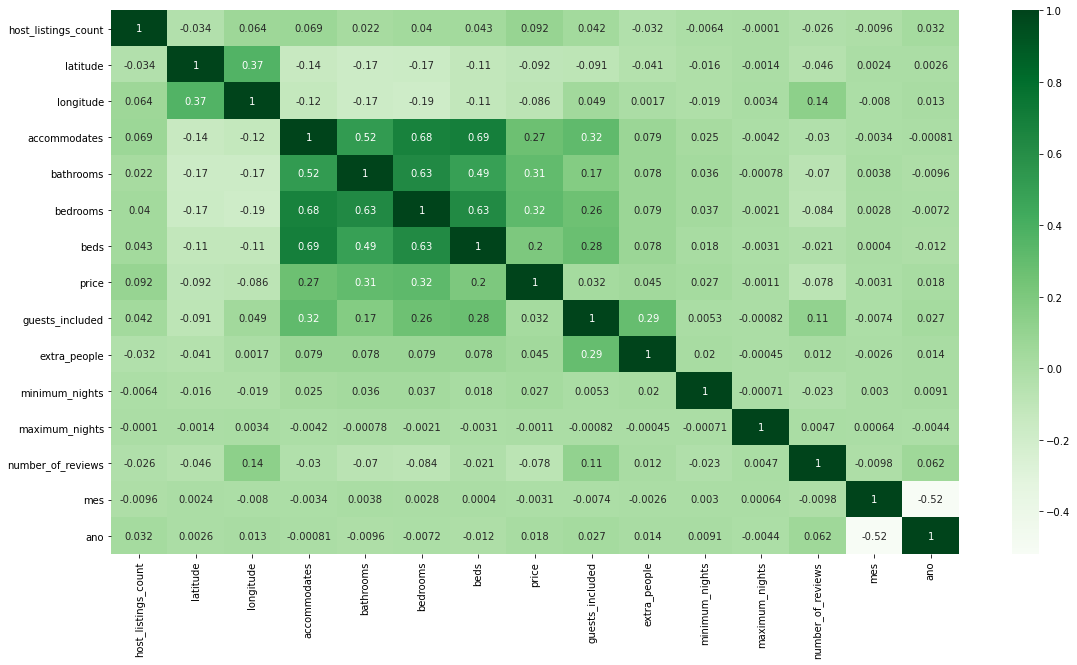

In [15]:
# Mapa de calor das correlações das colunas.

plt.figure(figsize=(19,10))
sns.heatmap(base_airbnb.corr(),annot=True,cmap='Greens')

#print(base_airbnb.corr())
#Concluímos que não tem nenhuma correlação extrema que de valores duplicados.
#portanto não excluiremos nenhuma coluna com essa análize preliminar.

### Definição de funções para análise de outliers
Vamos definir algumas funções para ajudar na análise de outliers das colunas


In [16]:
#função de limites de outliers
def limites(coluna):
    q1= coluna.quantile(0.25)
    q3= coluna.quantile(0.75)
    amplitude = q3-q1
    return q1-1.5*amplitude, q3+1.5*amplitude

def excluir_outliers (df, nome_coluna):
    qte_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna]>= lim_inf) & (df[nome_coluna]<=lim_sup) , : ]
    linhas_removidas = qte_linhas - df.shape[0]
    return df, linhas_removidas

In [17]:
#testando a funçao de limite de outliers
print(limites(base_airbnb['price']))
base_airbnb['price'].describe()

(-524.0, 1276.0)


count    897709.000000
mean        648.062195
std        1705.104980
min           0.000000
25%         151.000000
50%         297.000000
75%         601.000000
max      138288.000000
Name: price, dtype: float64

In [18]:
#formula do grafico de caixa dos limites dos outliers
def diagrama_caixa (coluna):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(19, 5)
    sns.boxplot(x= coluna, ax=ax1).set(xlabel= f'Coluna {coluna.name} com todos os dados.')
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x= coluna, ax=ax2).set(xlabel= f'Limite Outlier da coluna {coluna.name}')
    return

def histograma(coluna):
    plt.figure(figsize=(19,5))
    sns.histplot (coluna, kde=True).set(xlabel= f'Histograma da coluna {coluna.name}')
    return

def grafico_barra(coluna):
    plt.figure(figsize=(19,5))
    sns.barplot(x= coluna.value_counts().index , y= coluna.value_counts()).set_xlim(limites(coluna))
    return

## Price

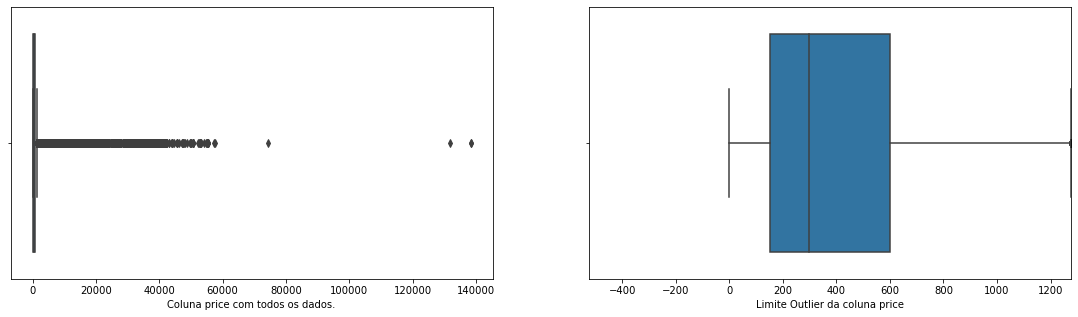

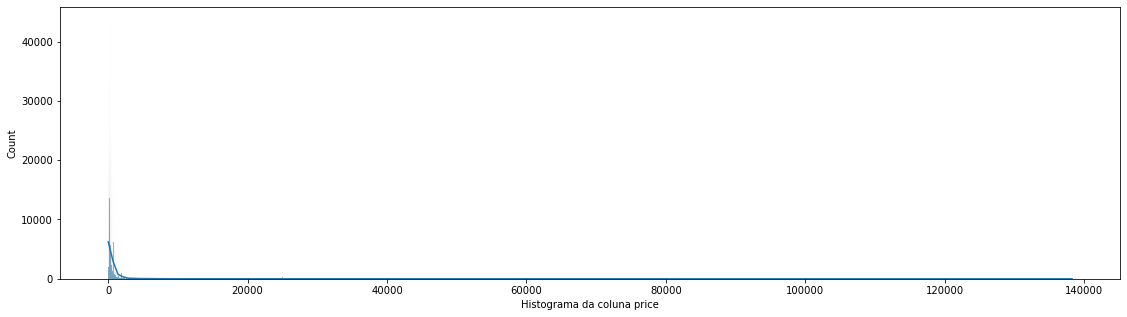

In [19]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

Como estamos construindo um modelo para imoveis comuns,acredito que os valores acima do limite superior serão apenas de apartamentos de altíssimo luxo,que não é o nosso objetivo principal. Por isso, podemos excluir os outliers e analisar quantos dados serão excluidos para analisar se essa alteração será realmente permanente em nossa análise.  

In [20]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'price')
print(f'{linhas_removidas} linhas removidas')

87282 linhas removidas


(810427, 25)


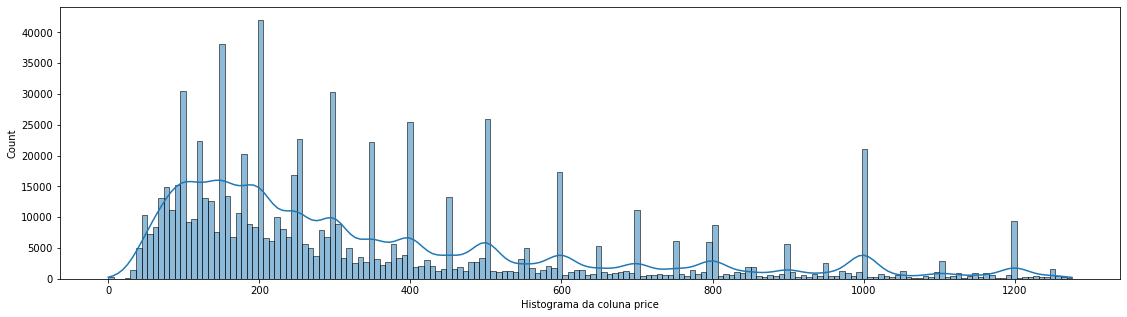

In [21]:
histograma(base_airbnb['price'])
print(base_airbnb.shape)

## Extra_people

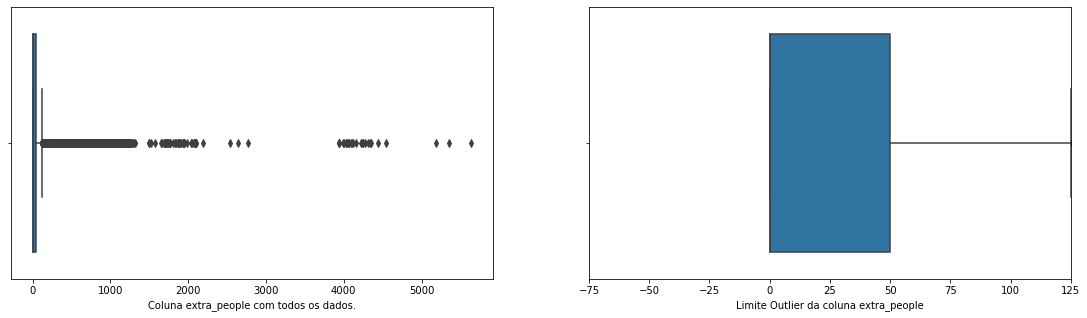

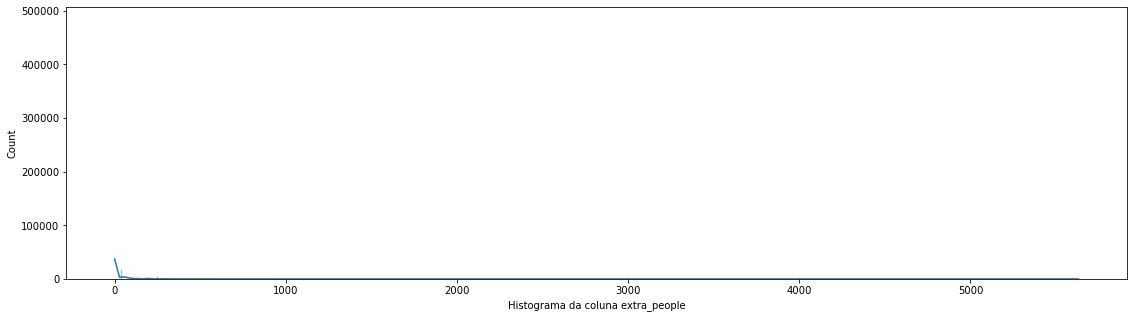

In [22]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

#### Por ora vamos excluir os outliers do extra_people. Mas iremos testar no final sem excluí-los.


In [23]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'extra_people')
print(f'{linhas_removidas} linhas removidas')

59194 linhas removidas


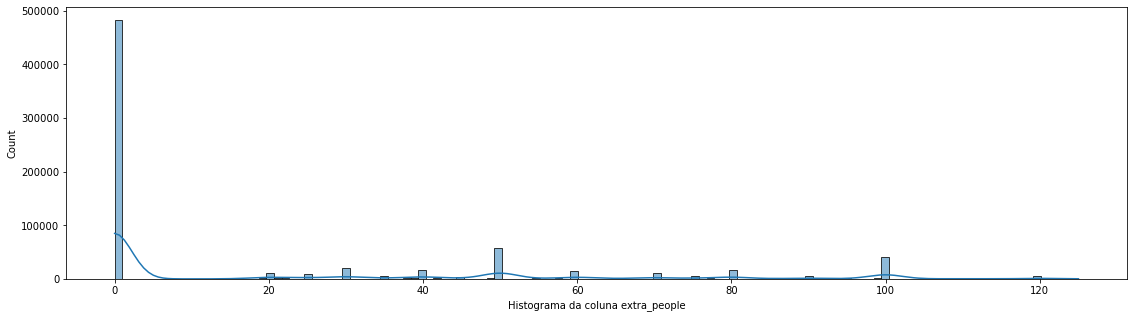

In [24]:
histograma(base_airbnb['extra_people'])

## Valores discretos


### host_listings_count

In [25]:
#comando auxiliar para criar a funçao
print(base_airbnb['host_listings_count'].value_counts())

1.0      391506
2.0      128922
3.0       53462
4.0       31266
5.0       18732
          ...  
488.0         1
103.0         1
336.0         1
176.0         1
161.0         1
Name: host_listings_count, Length: 188, dtype: int64


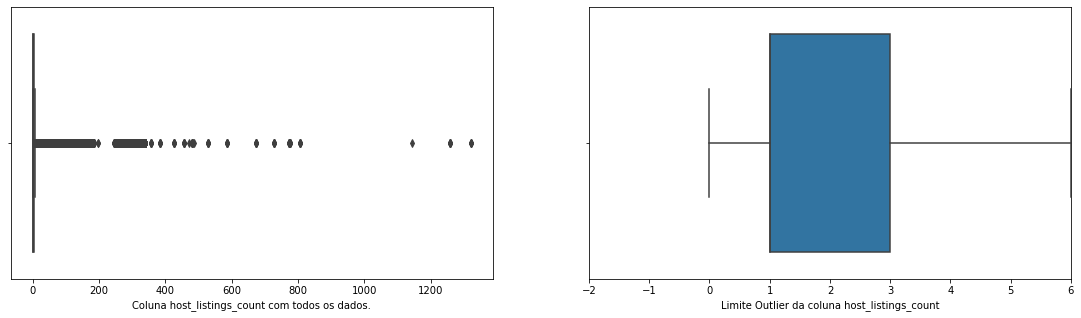

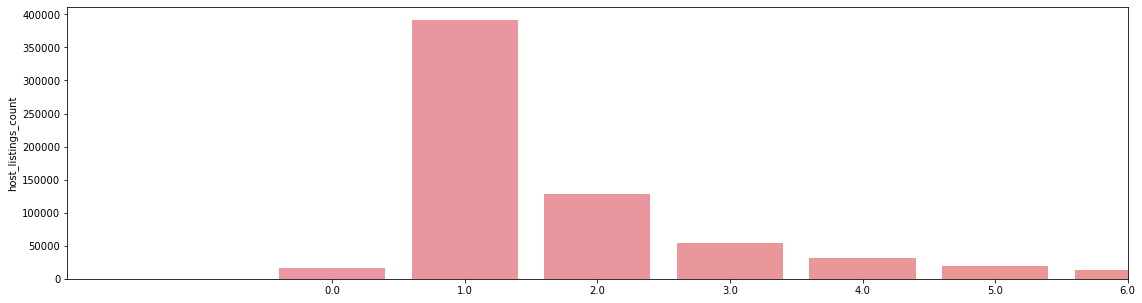

In [26]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

Podemos excluir outliers, porque para o objetivo do nosso projeto host com mais de 6 imóveis no airbnb, não é o público alvo do objetivo do porjeto. (imagino que sejam imobiliárias ou profissionais que gerenciam imóveis do airbnb) 

In [27]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'host_listings_count')
print(f'{linhas_removidas} linhas removidas')

97723 linhas removidas


### accommodates

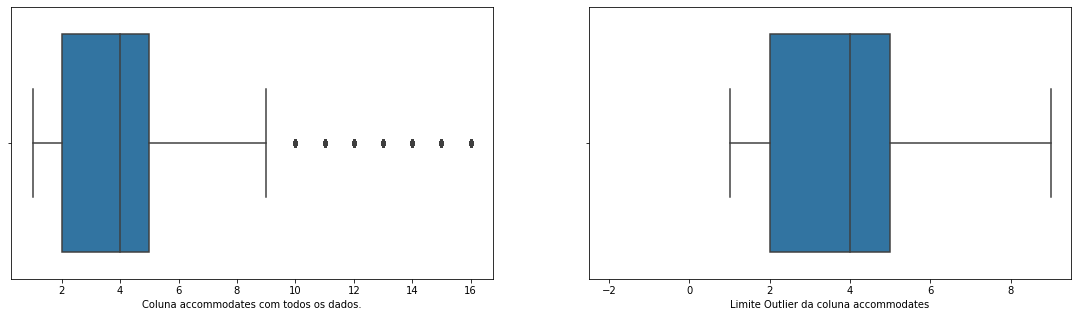

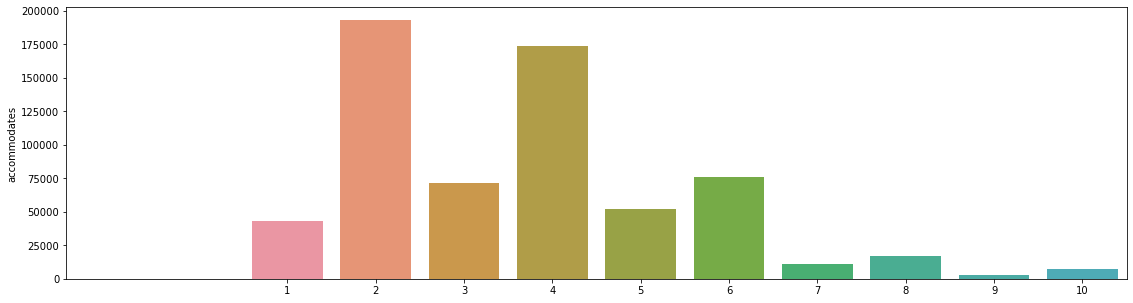

In [28]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

In [29]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'accommodates')
print(f'{linhas_removidas} linhas removidas')

13146 linhas removidas


Vamos excluir as outliers, pois residências que ultrapassam 10 acomodações saem do padrão que estamos analisando, e são poucas as incidencias que serão afetadas.

### bathrooms

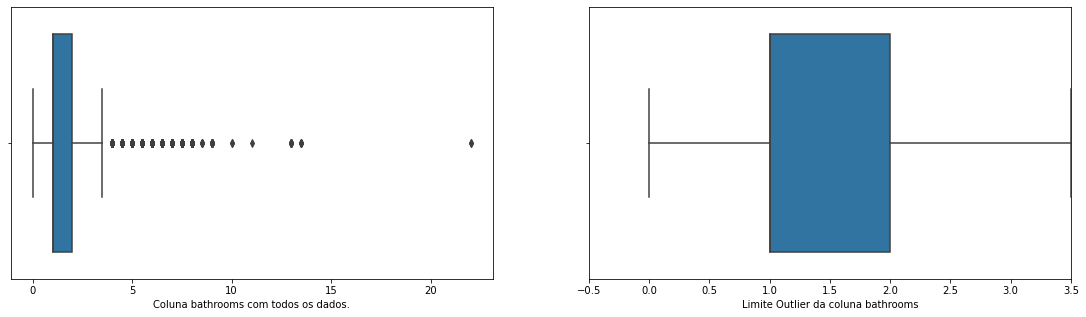

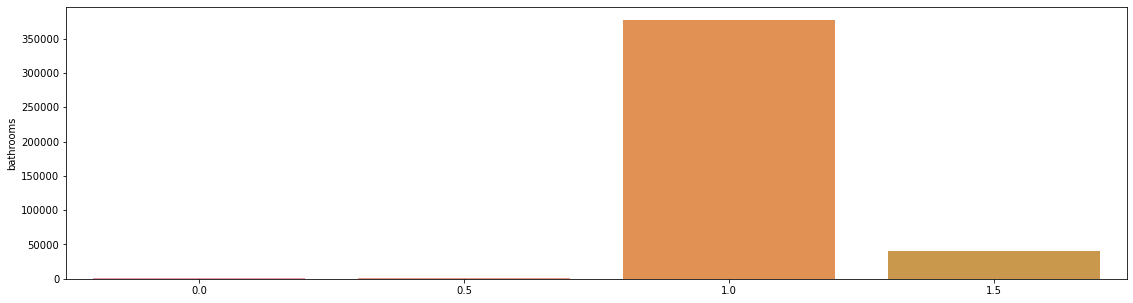

In [30]:
diagrama_caixa(base_airbnb['bathrooms'])
grafico_barra(base_airbnb['bathrooms'])
#como o limite no grafico de barra esta diferente do limite e foi visto que os limites estao corretos, vamos
#plotar manualmente esse grafico, arrumando-o para analisá-lo

<AxesSubplot:ylabel='bathrooms'>

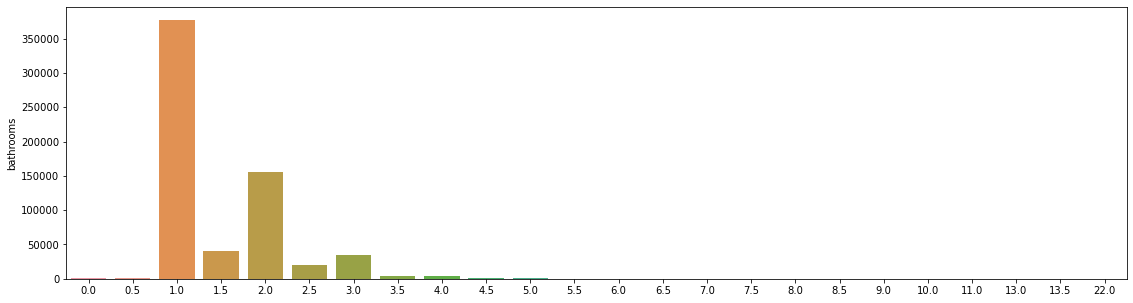

In [31]:
plt.figure(figsize=(19,5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index , y= base_airbnb['bathrooms'].value_counts())

In [32]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bathrooms')
print(f'{linhas_removidas} linhas removidas')

6894 linhas removidas


### bedrooms

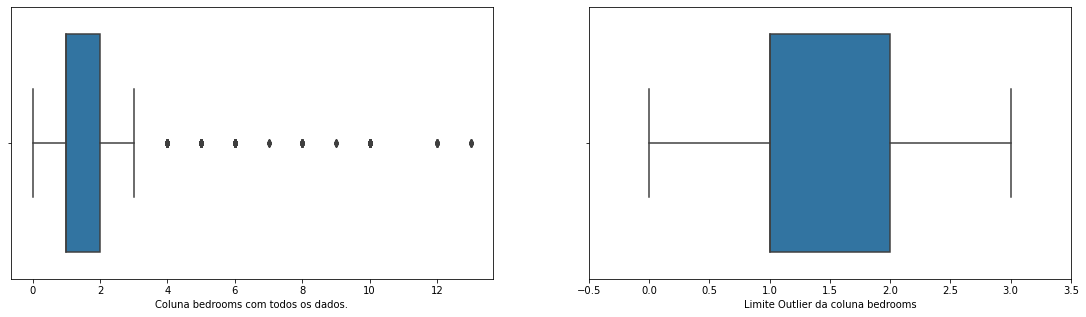

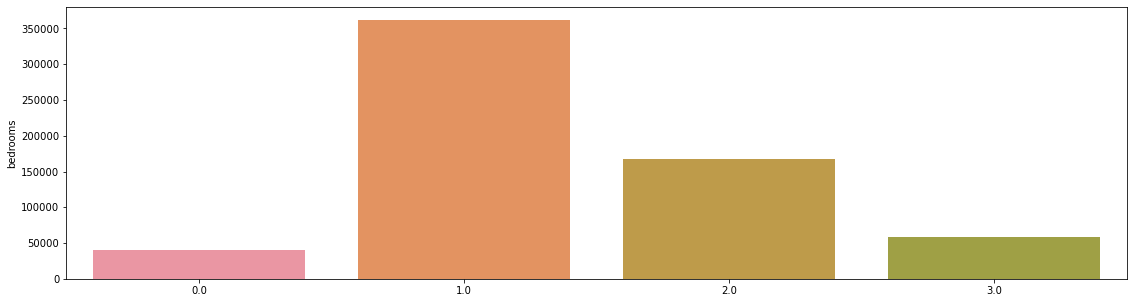

In [33]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

In [34]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bedrooms')
print(f'{linhas_removidas} linhas removidas')

5482 linhas removidas


### beds

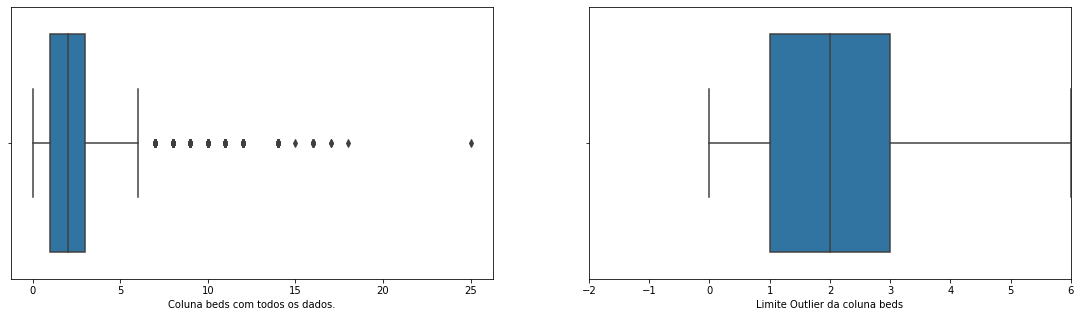

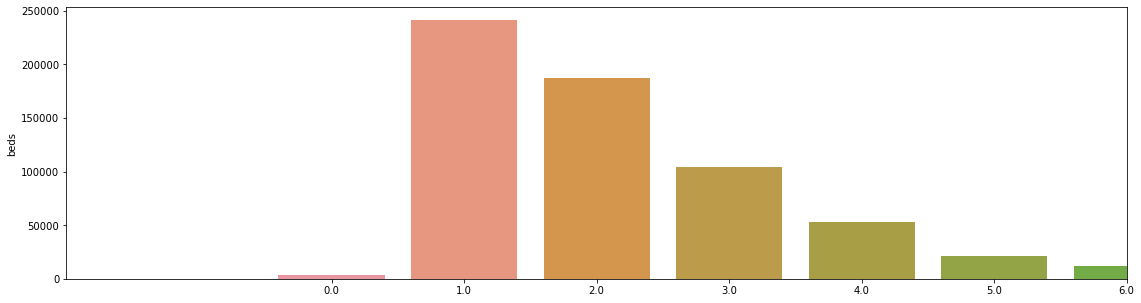

In [35]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

In [36]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'beds')
print(f'{linhas_removidas} linhas removidas')

5622 linhas removidas


### guests_included

<ipython-input-18-8df00a0c088e>:6: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax2.set_xlim(limites(coluna))
<ipython-input-18-8df00a0c088e>:17: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  sns.barplot(x= coluna.value_counts().index , y= coluna.value_counts()).set_xlim(limites(coluna))


(1.0, 1.0)


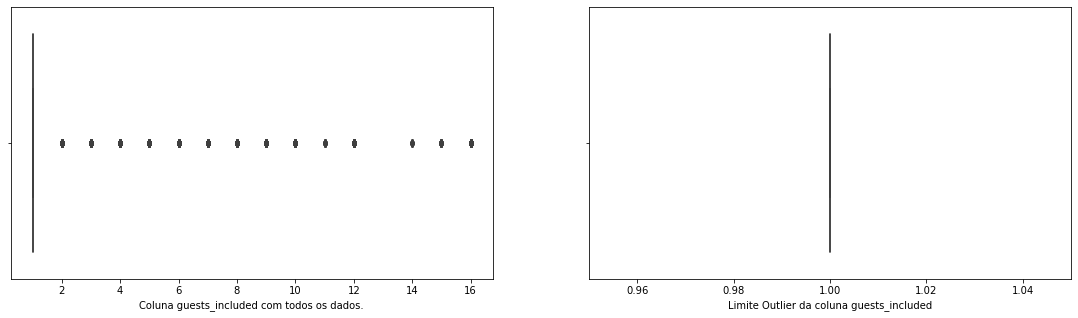

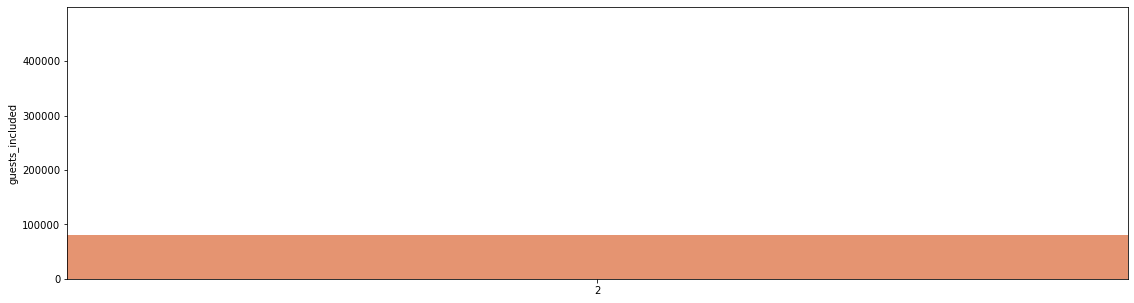

In [37]:
diagrama_caixa(base_airbnb['guests_included'])
grafico_barra(base_airbnb['guests_included'])
print(limites(base_airbnb['guests_included']))

<AxesSubplot:ylabel='guests_included'>

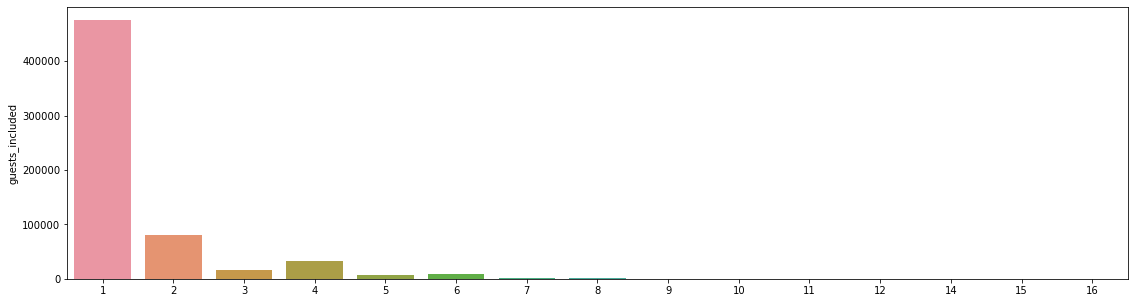

In [38]:
plt.figure(figsize=(19,5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index , y= base_airbnb['guests_included'].value_counts())

Me parece um erro de preenchimento do cadastro onde os usuários usam o valor padrão "1" para preencher esse campo no cadastro. Não aparentando ser uma boa metrica. Portanto vamos remover essa característica completamente de nossa análise pois o nosso modelo pode considerar erroneamente que é essencial para a definição do preço, sendo que provavelmente não seja.

In [39]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)
base_airbnb.shape

(622366, 24)

### minimum_nights

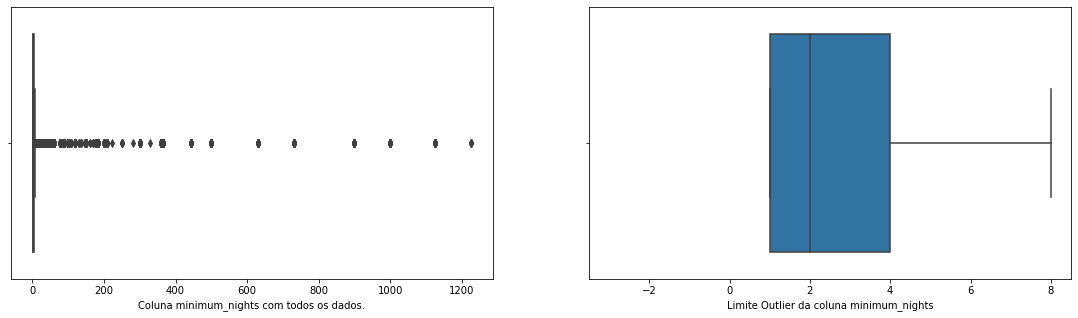

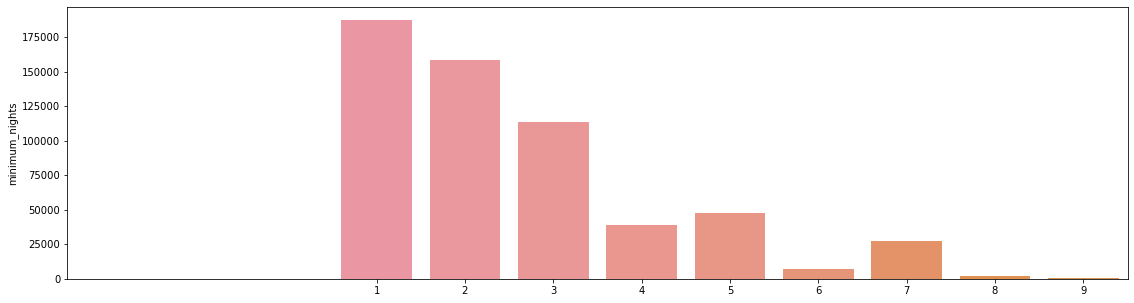

In [40]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

In [41]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'minimum_nights')
print(f'{linhas_removidas} linhas removidas')

40383 linhas removidas


Removendo os imóveis que precisam de mais de 8 dias minimos de aluguel, pois não faz nem sentido, analisar imoveis com tais exigencias.

### maximum_nights 

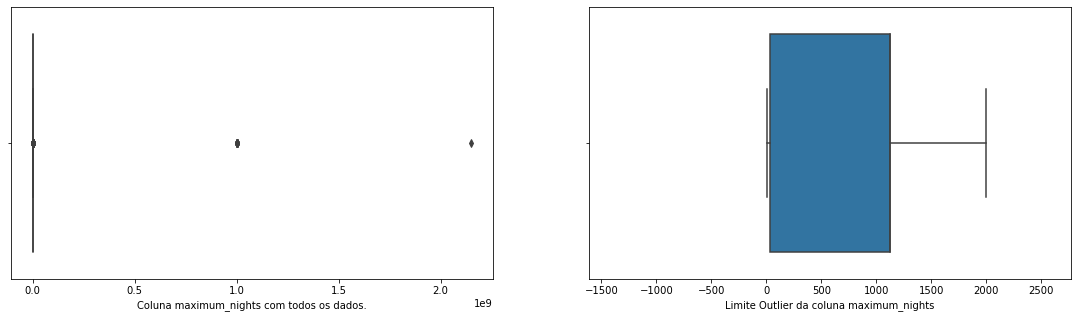

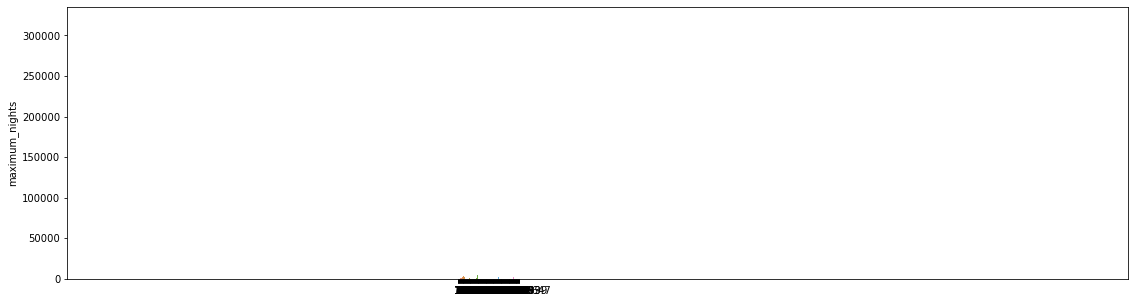

In [42]:
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

<AxesSubplot:ylabel='maximum_nights'>

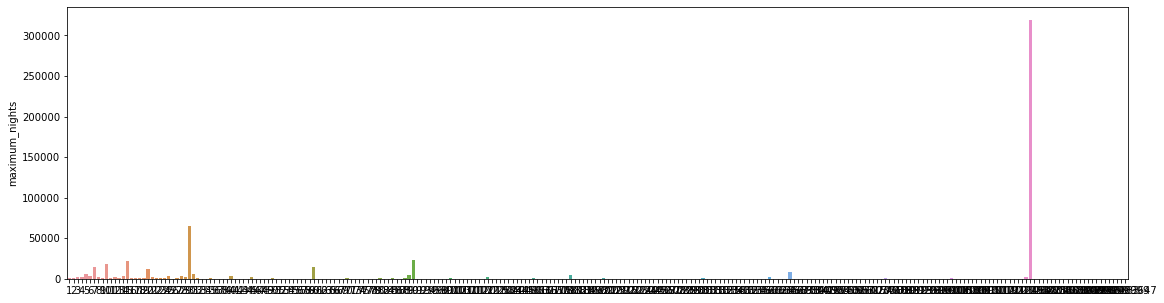

In [43]:
plt.figure(figsize=(19,5))
sns.barplot(x=base_airbnb['maximum_nights'].value_counts().index , y= base_airbnb['maximum_nights'].value_counts())

Vamos remover totalmente essa metrica da análise pois me parece o mesmo caso de mal preenchimento do cadastro, que não vai impactar corretamente no calculo do preço.

In [44]:
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)
base_airbnb.shape

(581983, 23)

### number_of_reviews        

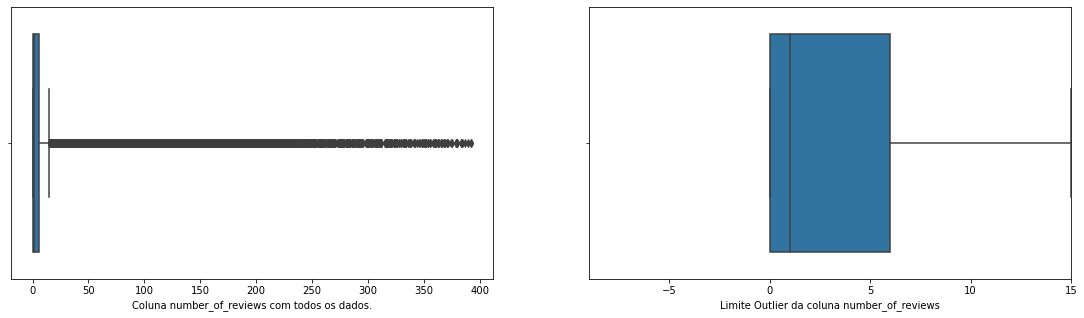

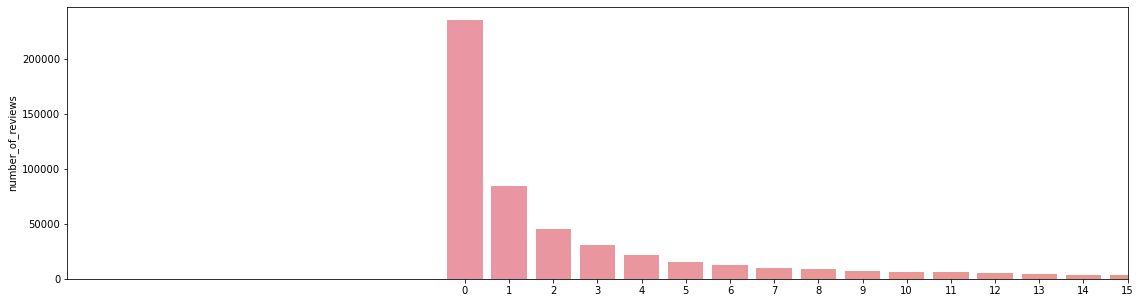

In [45]:
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

Vamos remover todos os números de reviews da análise, pois quem for colocar um novo imóvel para alugar na Airbnb vai ter o número de reviews igual a zero, então não tem como usar essa característica para prever o preço.

In [46]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.shape

(581983, 22)

# Tratamento de colunas de valores com características em textos

In [47]:
print(base_airbnb.dtypes)

host_is_superhost            object
host_listings_count         float32
host_has_profile_pic         object
host_identity_verified       object
latitude                    float32
longitude                   float32
property_type                object
room_type                    object
accommodates                  int32
bathrooms                   float32
bedrooms                    float32
beds                        float32
bed_type                     object
amenities                    object
price                       float32
extra_people                float32
minimum_nights                int32
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
mes                           int32
ano                           int32
dtype: object


## São:

- property_type                
- room_type                    
- bed_type                     
- amenities                   
- cancellation_policy         

### property_type 


Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                      34
Resort    

D:\Users\magal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


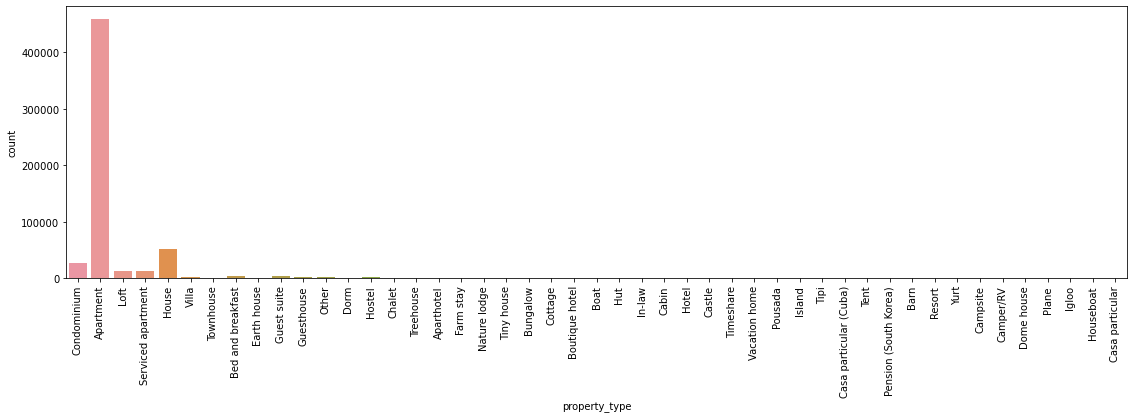

In [48]:
display (base_airbnb['property_type'].value_counts())

plt.figure(figsize=(19,5))
grafico = sns.countplot ('property_type',data=base_airbnb)
grafico.tick_params (axis='x', rotation=90)

como todos os tipos abaixo de "Others" tem quantidades praticamente insignificantes, analisálos como categorias separadas vão acabar tornando seus dados irrelevantes para efeitos comparativos, portanto vamos agrupar esses dados todos como categoria outros, para simplificar o processo de análise e comparação.

In [49]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar= []
for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo]<2000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)    

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Island', 'Boat', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'In-law', 'Igloo', 'Vacation home', 'Timeshare', 'Houseboat', 'Pousada', 'Casa particular', 'Plane']


Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: property_type, dtype: int64

D:\Users\magal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


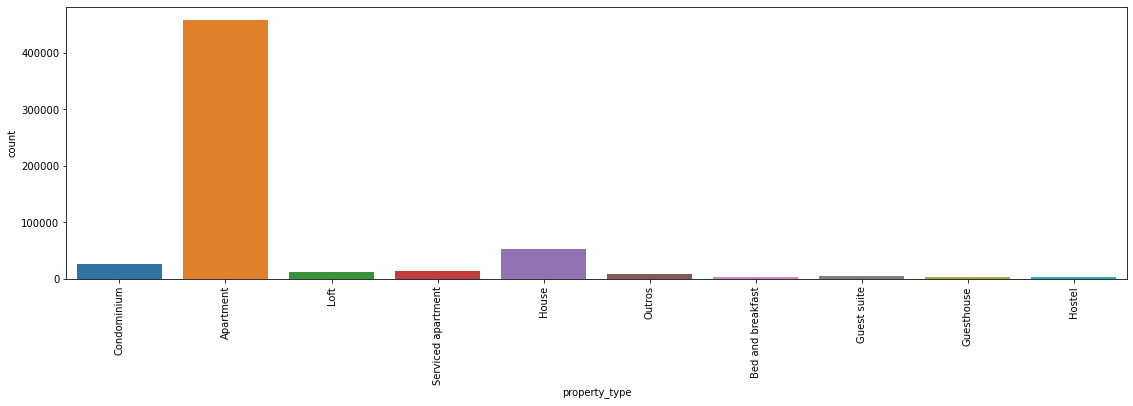

In [50]:
for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['property_type']==tipo,'property_type']= 'Outros'
display (base_airbnb['property_type'].value_counts())
plt.figure(figsize=(19,5))
grafico = sns.countplot ('property_type',data=base_airbnb)
grafico.tick_params (axis='x', rotation=90)

### room_type

Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: room_type, dtype: int64

D:\Users\magal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


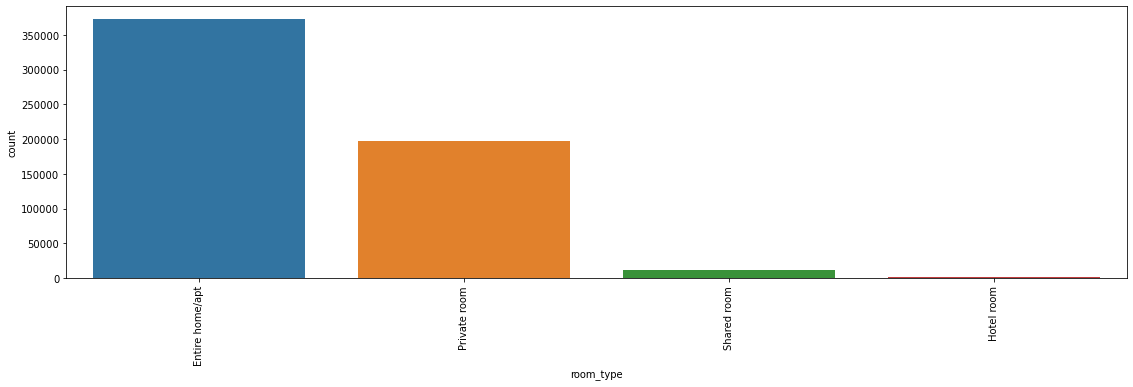

In [51]:
display (base_airbnb['room_type'].value_counts())

plt.figure(figsize=(19,5))
grafico = sns.countplot ('room_type',data=base_airbnb)
grafico.tick_params (axis='x', rotation=90)

Poucas categorias, não faremos alteração aqui.

### bed_type 

Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: bed_type, dtype: int64

D:\Users\magal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


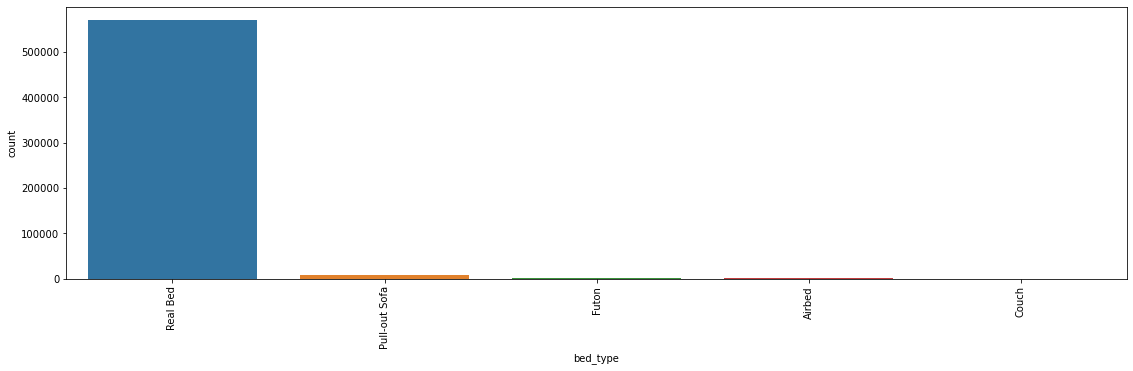

In [52]:
display (base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(19,5))
grafico = sns.countplot ('bed_type',data=base_airbnb)
grafico.tick_params (axis='x', rotation=90)

Real Bed    570643
Outros       11340
Name: bed_type, dtype: int64

D:\Users\magal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


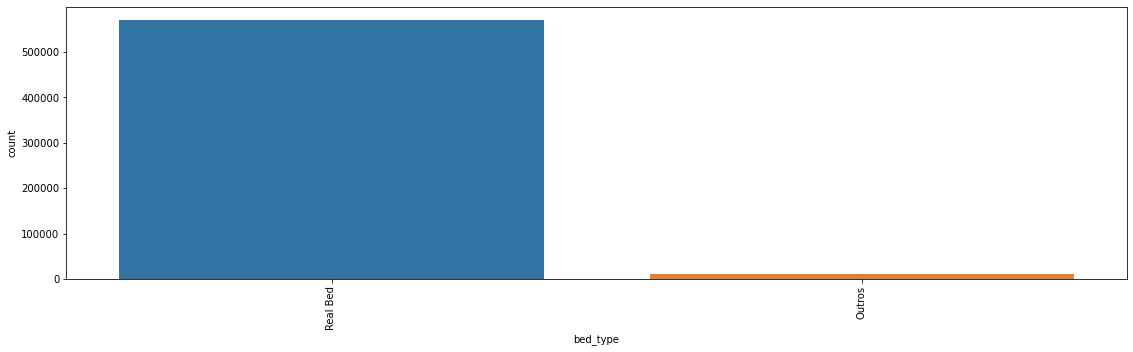

In [53]:
tabela_bed = base_airbnb['bed_type'].value_counts()
colunas_agrupar= []
for tipo in tabela_bed.index:
    if tabela_bed[tipo]<10000:
        colunas_agrupar.append(tipo)
    
for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['bed_type']==tipo,'bed_type']= 'Outros'
display (base_airbnb['bed_type'].value_counts())
plt.figure(figsize=(19,5))
grafico = sns.countplot ('bed_type',data=base_airbnb)
grafico.tick_params (axis='x', rotation=90)

Poucas categorias, porém somente um valor tem grande quantidades enquanto o resto tem pouco e valores bem próximo, então nesse caso teríamos duas opções:
   - Deixar como está.
   - Agrupar todos os parametros de baixo valor em uma única categoria ficando com apenas duas categorias. (É o que decidimos fazer)

### cancellation_policy 

flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: cancellation_policy, dtype: int64

D:\Users\magal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


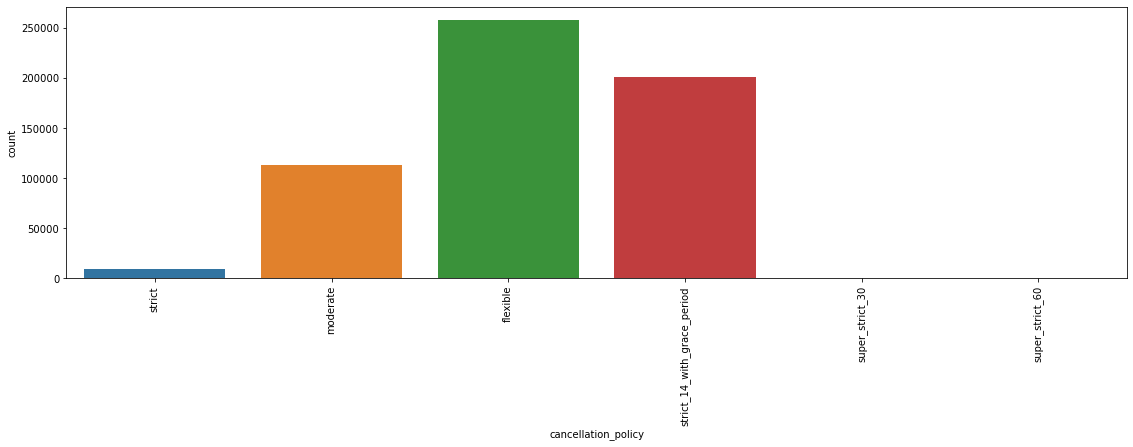

In [54]:
display (base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(19,5))
grafico = sns.countplot ('cancellation_policy',data=base_airbnb)
grafico.tick_params (axis='x', rotation=90)

flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: cancellation_policy, dtype: int64

D:\Users\magal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


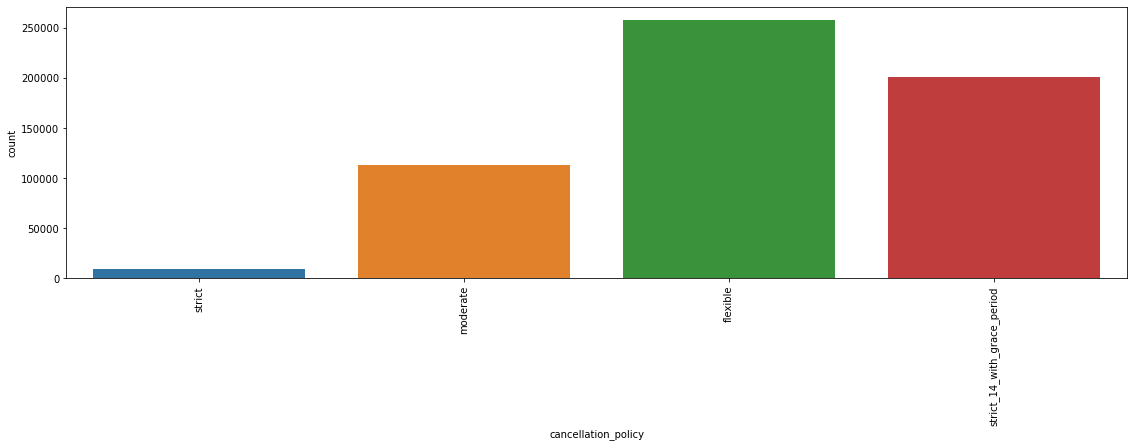

In [55]:
tabela_cancellation = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar= []
for tipo in tabela_cancellation.index:
    if tabela_cancellation[tipo]<10000:
        colunas_agrupar.append(tipo)
    
for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['cancellation_policy']==tipo,'cancellation_policy']= 'strict'
display (base_airbnb['cancellation_policy'].value_counts())
plt.figure(figsize=(19,5))
grafico = sns.countplot ('cancellation_policy',data=base_airbnb)
grafico.tick_params (axis='x', rotation=90)

Agrupamos as categorias stricts, pois os valores de super_istrict_30 e super_strict_60 são infimos para ajudar na análise.

### amenities                   

- como temos uma diversidade muito grande de amenities e como as mesmas amenties podem ser escritas de forma diferente, vamos avaliar a quantidade de amenities como parâmetro para nosso modelo.

In [58]:
print (base_airbnb['amenities'].iloc[0])
print (len(base_airbnb['amenities'].iloc[0].split(',')))

base_airbnb['n_amenities']= base_airbnb['amenities'].str.split(',').apply(len)


{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,"Paid parking off premises","Smoking allowed",Doorman,Elevator,"Hot tub","Family/kid friendly","Suitable for events",Essentials,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in","Front desk/doorperson","Private entrance","Hot water","Bed linens","Luggage dropoff allowed"}
25


In [59]:
print(base_airbnb['n_amenities'])

1        25
3        14
4        16
5        30
6        30
         ..
34323    15
34324    18
34325    12
34327    25
34328    17
Name: n_amenities, Length: 581983, dtype: int64


In [60]:
#removendo a coluna de amenities, pois nao sera mais usada:

base_airbnb = base_airbnb.drop('amenities', axis=1)

In [62]:
base_airbnb.shape

(581983, 22)

# Tratamento de colunas de valores "SIM/NÃO"

# Encoding

### Modelo de Previsão

### Análise do Melhor Modelo

### Ajustes e Melhorias no Melhor Modelo